In [98]:
import pandas as pd
import numpy as np
import os
import re



df_Dict={}


for Year in range(1996,2021):
    for entry in os.scandir(r'C:\Users\KAGUMBA\Capstone_2\Raw_Files'):
        if (str(Year) in entry.path) and ('Addendum' not in entry.path):
            df_Dict[Year]= pd.read_csv(entry.path).dropna(axis =1, how ='all').dropna(axis =0, how = 'all')


In [99]:
Raw_ColNames={}

for i in range(7):
    Raw_ColNames[i]=[]
#Checking consistency in column names
for i in range(7):
    for Year in range(1996,2021):
        Raw_ColNames[i].append(df_Dict[Year].columns[i])

for i in range(7):
    print('Column {}-'.format(i+1),set(Raw_ColNames[i]))
    
#Looks like all column names are in the right order but with different names

Column 1- {'Sector'}
Column 2- {'Surname', 'Last name', 'Last Name'}
Column 3- {'First Name', 'First name'}
Column 4- {'Salary Paid ', 'Salary paid', 'Salary Paid'}
Column 5- {'Taxable Benefits', 'Taxable benefits'}
Column 6- {'Employer'}
Column 7- {'Job title', 'Position', 'Job Title'}


In [100]:
#Standardize column names
Clean_ColNames=['Sector','Last Name','First Name','Salary','Tax Benefits','Employer','Job Title','Year']

for Year in range(1996,2021):
    df_Dict[Year].columns=Clean_ColNames
    

In [101]:
#Check for missing values
for Year in range(1996,2021):
    if df_Dict[Year].isna().sum().any()>0:
        for column in Clean_ColNames:
            if df_Dict[Year][column].isna().sum()>0:
                print(Year)
                print(' [{}] missing values = {}'.format(column,df_Dict[Year][column].isna().sum()))

1996
 [First Name] missing values = 1
1997
 [Job Title] missing values = 1
1998
 [First Name] missing values = 1
2013
 [First Name] missing values = 1
2016
 [Tax Benefits] missing values = 1


In [102]:
#Looks like there's only a few areas with missing data, I'll put them into a small data frame to take a look at them

df_MissingData=pd.DataFrame(columns=Clean_ColNames)    
    
for Year in range(1996,2021):
    if df_Dict[Year].isna().sum().any()!=0:
        for column in Clean_ColNames:
            if df_Dict[Year][column].isna().sum()>0:
                df_MissingData=df_MissingData.append(df_Dict[Year][df_Dict[Year][column].isna()],ignore_index=True)
                

df_MissingData
#Make note that they're all 'NaN' when converting colulmn data types into a string, I'll be sure to be cognisent of that

,Sector,Last Name,First Name,Salary,Tax Benefits,Employer,Job Title,Year
0,MUNICIPALITIES,Yearwood,NaN,"$116,371.00",$978.00,Municipality of Metropolitan Toronto,Deputy Commissioner of Corp. Serv.,1996
1,Crown Agencies,Walker,G J,"$104,932.87",$403.32,Ontario Hydro,NaN,1997
2,Crown Agencies,DONNELLY,NaN,"$100,813.00","$21,526.00",Ontario Hydro,"Mgr, Labour Reltns, IMO/CMO/N-",1998
3,Crown Agencies,LI,NaN,108421.82,47.18,eHealth Ontario,Privacy and Security Architect,2013
4,Other Public Sector Employers,Malenfant,James,"$152,545.47",NaN,Independent Electricity System Operator,Senior Analyst - Compliance and Dispute Resolu...,2016


In [103]:
#Standardize the column data types 


#Now to check and standardize the data types for all columns
#This is the target end result for data types per column
#'Sector'---------->str
#'Last Name'------->str
#'First Name'------>str
#'Salary'---------->str-->float
#'Tax Benefits'---->str-->float
#'Employer'-------->str
#'Job Title'------->str
#'Year'------------>int

for Year in range(1996,2021):
    for column in df_Dict[Year].columns:
        if column == 'Year':
            try:
                df_Dict[Year][column].fillna(Year) #Fill in missing values with the year
                df_Dict[Year][column]=df_Dict[Year][column].astype(int)
            except ValueError:
                print("Trouble in {}'s data in the {} column".format(Year,column))
        else:
            try:
                df_Dict[Year][column]=df_Dict[Year][column].fillna(np.nan).astype(str)
            except ValueError:
                print("Trouble in {}'s data in the {} column".format(Year,column))


Trouble in 2016's data in the Year column


In [104]:
#Isolate affected rows
Affected_Rows=df_Dict[2016][df_Dict[2016]['Year'] != str(2016)]

#Concatenate strings from affected rows in 'Job Title' and 'Year'
Jobs_Concat=Affected_Rows['Job Title']+' '+Affected_Rows['Year']

#Replace new string in affected rows of 'Job Title Column'
for index,value in Jobs_Concat.items():
    df_Dict[2016].at[index,'Job Title']=value

#Check to make sure changes have been made to the dataframe
df_Dict[2016][df_Dict[2016]['Year'] != str(2016)]

,Sector,Last Name,First Name,Salary,Tax Benefits,Employer,Job Title,Year
6223,Crown Agencies,Fagan,Thomas,"$126,498.77",$0.00,Landlord and Tenant Board,Social Benefits Tribunal Member (Part-time) /...,Member (Part-time) / Membre (à temps partiel)
9323,Crown Agencies,Doran,Patrick,"$121,415.63",$0.00,Social Benefits Tribuna,Child and Family Services Review Board and Cu...,Member (Part-time) / Membre (à temps partiel)
23040,Government of Ontario - Ministries,LeBlanc,Laurie,"$242,431.56","$23,569.27",Municipal Affairs,Housing Deputy Minister,Deputy Minister
32225,Hospitals and Boards of Public Health,Levac,Jody J.,"$169,367.20",$622.35,Southlake Regional Health Centre,Director seconded to Stevenson Memorial Hospi...,seconded to Stevenson Memorial Hospital as CEO
32238,Hospitals and Boards of Public Health,Mccarron,Veronica J.,"$133,124.22",$493.25,Southlake Regional Health Centre,Manager seconded to Cancer Care Ontario,seconded to Cancer Care Ontario
...,...,...,...,...,...,...,...,...
122148,Universities,Weisener,Chris,"$135,388.56",$535.08,University of Windsor,Associate Professor Researcher,Researcher
122149,Universities,Wellington,William,"$233,108.08",$539.04,University of Windsor,Associate Professor Program Advisor,Program Advisor
122152,Universities,Williams,Mita,"$129,848.16",$519.66,University of Windsor,Librarian III Preceptor,Preceptor
122165,Universities,Wu,Qingming,"$157,097.76","$1,728.75",University of Windsor,Professor Canada Research Chair,Canada Research Chair


In [105]:
#Replace all the values in the 'Year' column with int 2016
df_Dict[2016]['Year']=2016 

#Checking out the 'Year' column in all the dataframes
for Year in range(1996,2021):
    print(Year, set(df_Dict[Year]['Year']))
    
    
#Looks like 2015 has a few different values in the 'Year' column

1996 {1996}
1997 {1997}
1998 {1998}
1999 {1999}
2000 {2000}
2001 {2001}
2002 {2002}
2003 {2003}
2004 {2004}
2005 {2005}
2006 {2006}
2007 {2007}
2008 {2008}
2009 {2009}
2010 {2010}
2011 {2011}
2012 {2012}
2013 {2013}
2014 {2014}
2015 {2016, 2017, 2018, 2015}
2016 {2016}
2017 {2017}
2018 {2018}
2019 {2019}
2020 {2020}


In [106]:
df_Dict[2015][df_Dict[2015]['Year'] != 2015]
#looking at them, I'll assume that those were just typos and replace them all with 2015

,Sector,Last Name,First Name,Salary,Tax Benefits,Employer,Job Title,Year
76671,Universities,Webb,Paul,"$105,001.75",$622.01,King's University College,Professor,2016
111692,Other Public Sector Employers,Yue,Jenny,"$114,158.53",$131.94,Colleges Ontario,"Senior Manager, Finance And Administration",2016
113433,Other Public Sector Employers,Macdonald,Christine,"$100,789.02",$-,Mitacs Inc.,"Director, Business Development & Team Lead Ont...",2016
113434,Other Public Sector Employers,Parlee,Forrest,"$108,709.89",$-,Mitacs Inc.,"Director, Partnerships",2017
115175,Other Public Sector Employers,Udovic,Natasha,"$129,807.63",$867.92,"Toronto Festival of Arts, Culture and Creativity","Senior Director, Corporate Partnerships",2016
115176,Other Public Sector Employers,Wagner,John Clyde,"$168,230.79",$867.92,"Toronto Festival of Arts, Culture and Creativity",Executive Producer,2017
115177,Other Public Sector Employers,Weisbrodt,Jorn,"$207,692.37","$1,272.92","Toronto Festival of Arts, Culture and Creativity",Artistic Director,2018
115248,Other Public Sector Employers,Tanos,Antonia,"$102,222.20","$3,664.48",Toronto Organizing Committee for the 2015 Pan ...,Senior Project Management Analyst / Analyste p...,2016


In [107]:
df_Dict[2015]['Year']=2015 

In [108]:
#Standardize 'Sector', 'Last Name', 'First Name' and 'Employer' columns to title case
#Standardize 'Salary' and 'Tax Benefits' columns to floats with a regex

for Year in range(1996,2021):
    for column in df_Dict[Year].columns:
        if column in ['Sector', 'Last Name', 'First Name', 'Employer','Job Title']:
            df_Dict[Year][column]=df_Dict[Year][column].str.title()
        elif column in ['Salary','Tax Benefits']:
            df_Dict[Year][column]=df_Dict[Year][column].str.replace(r'[^0-9.]', '',regex = True)
            
            
            
for Year in range(1996,2021):
    for column in df_Dict[Year].columns:
        if column in ['Salary','Tax Benefits']:
            try:
                df_Dict[Year][column]=df_Dict[Year][column].astype(float)
            except ValueError:
                print("Trouble in {}'s data in the {} column".format(Year,column))
            

Trouble in 2015's data in the Tax Benefits column
Trouble in 2016's data in the Tax Benefits column


In [109]:
# df_Dict[2015][df_Dict[2015]['Tax Benefits'].str.contains('[^0-9.]',regex=True)]

# df_Dict[2015]['Tax Benefits'].str.contains(pat='[^0-9.]',regex=True)
    
# df_Dict[2015]['Tax Benefits'].filter(regex='[^0-9.]',axis=1)    
    

print('2015-Tax Benefits missing data =',len(df_Dict[2015][df_Dict[2015]['Tax Benefits']=='']))    
print('2016-Tax Benefits missing data =',len(df_Dict[2016][df_Dict[2016]['Tax Benefits']=='']))

    
#2015 DataFrame -Missing 6980 values for Tax Benefits
#2016 DataFrame -Missing 1 value for Tax Benefits    
    
#looks like a lot of rows without Tax Benefits data...not sure whether the values are just zero or actual missing data.
#I might just leave it for now and leave it as NaN since Tax Benefits aren't my main variable of interest

2015-Tax Benefits missing data = 6980
2016-Tax Benefits missing data = 1


In [110]:
#Change blank cells to NaNs
for Year in [2015,2016]:
    #Isolate affected rows
    Missing_Cells=df_Dict[Year][df_Dict[Year]['Tax Benefits'] == '']

    #Replace blank cells with NaN
    NaN_Fix=Missing_Cells['Tax Benefits'].replace('', np.NaN)

    #Replace new string in affected rows of 'Job Title Column'
    for index,value in NaN_Fix.items():
        df_Dict[Year].at[index,'Tax Benefits']=value

    print('{}-Tax Benefits blank data ='.format(Year),len(df_Dict[Year][df_Dict[Year]['Tax Benefits']=='']))           

2015-Tax Benefits blank data = 0
2016-Tax Benefits blank data = 0


In [111]:
#Finally convert the Tax Benefits columns for 2015 and 2016 into floats
for Year in [2015,2016]:
    df_Dict[Year]['Tax Benefits']=df_Dict[Year]['Tax Benefits'].astype(float)

In [112]:
#Appending all DataFrames together

df_AllData=pd.DataFrame(columns=Clean_ColNames)  

for Year in range(1996,2021):
    df_AllData=df_AllData.append(df_Dict[Year])
        

In [113]:

df_AllData.sort_values(by=['Last Name','First Name','Sector','Employer'])
#A quick look at the values sorted, I find some inconsitencies in the first 2 last names

,Sector,Last Name,First Name,Salary,Tax Benefits,Employer,Job Title,Year
112380,School Boards,$1.00,Lisa Ann,125528.08,1445.62,Durham Catholic District School Board,Elementary Principal,2018
17065,Government Of Ontario - Ministries,$1.00,Nicole,105222.39,144.83,Children And Youth Services,"Director, North Region",2018
9201,Hydro One And Ontario Power Generation,A'Court,Adrian,103297.32,0.00,Ontario Power Generation,Electrician Foreman Construction,2005
22060,Hydro One And Ontario Power Generation,A'Court,Adrian,104418.08,6097.20,Ontario Power Generation,Electrician Foreman Construction,2009
71764,Hydro One And Ontario Power Generation,A'Court,Adrian,108870.60,6280.40,Ontario Power Generation,Electrician Foreman Construction,2011
...,...,...,...,...,...,...,...,...
53487,Universities,�Tongu�-Mayer,Raoul,129729.00,729.48,Laurentian University Of Sudbury,Full Professor,2009
53216,Universities,�Tongu�-Mayer,Raoul,137401.50,758.81,Laurentian University Of Sudbury,"Full Professor, Geography",2010
56165,Universities,�Tongu�-Mayer,Raoul,137774.48,763.13,Laurentian University Of Sudbury,Full Professor,2011
126519,Universities,�Tongu�-Mayer,Raoul,171843.35,477.63,Laurentian University Of Sudbury,Full Professor,2017


In [114]:
df_AllData[(df_AllData['First Name']=='Nicole')&
           (df_AllData['Sector']=='Government Of Ontario - Ministries')&
           (df_AllData['Employer']=='Children And Youth Services')].sort_values(by=['Last Name','First Name','Sector','Employer'])

,Sector,Last Name,First Name,Salary,Tax Benefits,Employer,Job Title,Year
17065,Government Of Ontario - Ministries,$1.00,Nicole,105222.39,144.83,Children And Youth Services,"Director, North Region",2018
13421,Government Of Ontario - Ministries,True,Nicole,124470.63,192.96,Children And Youth Services,"Director, North Region",2016


In [115]:
df_AllData[(df_AllData['First Name']=='Lisa Ann')&
           (df_AllData['Sector']=='School Boards')&
           (df_AllData['Employer']=='Durham Catholic District School Board')].sort_values(by=['Last Name','First Name','Sector','Employer'])

,Sector,Last Name,First Name,Salary,Tax Benefits,Employer,Job Title,Year
112380,School Boards,$1.00,Lisa Ann,125528.08,1445.62,Durham Catholic District School Board,Elementary Principal,2018
44653,School Boards,True,Lisa Ann,100400.48,228.72,Durham Catholic District School Board,"Elementary Teacher, Consultant",2010
46504,School Boards,True,Lisa Ann,101967.84,801.40,Durham Catholic District School Board,Elementary Vice Principal,2011
63831,School Boards,True,Lisa Ann,109875.71,1447.51,Durham Catholic District School Board,Elementary Vice Principal,2012
72331,School Boards,True,Lisa Ann,105470.04,1678.12,Durham Catholic District School Board,Elementary Vice Principal,2013
63593,School Boards,True,Lisa Ann,111577.80,1689.32,Durham Catholic District School Board,Elementary Principal,2014
62750,School Boards,True,Lisa Ann,113575.43,1680.12,Durham Catholic District School Board,Elementary Principal,2015
91117,School Boards,True,Lisa Ann,120123.12,1712.68,Durham Catholic District School Board,Elementary Principal,2016
107247,School Boards,True,Lisa Ann,122483.73,1757.80,Durham Catholic District School Board,Elementary Principal,2017
146284,School Boards,True,Lisa Ann,126709.59,1329.00,Durham Catholic District School Board,Elementary Principal,2019


In [116]:
#Changing $1.00 last names into 'True' 
df_AllData.loc[(df_AllData['First Name']=='Lisa Ann')&
               (df_AllData['Sector']=='School Boards')&
               (df_AllData['Employer']=='Durham Catholic District School Board'),'Last Name']='True'

df_AllData.loc[(df_AllData['First Name']=='Nicole')&
               (df_AllData['Sector']=='Government Of Ontario - Ministries')&
               (df_AllData['Employer']=='Children And Youth Services'),'Last Name']='True'

In [117]:
#Looks like the issue has been fixed
df_AllData.sort_values(by=['Last Name','First Name','Sector','Employer'])

,Sector,Last Name,First Name,Salary,Tax Benefits,Employer,Job Title,Year
9201,Hydro One And Ontario Power Generation,A'Court,Adrian,103297.32,0.00,Ontario Power Generation,Electrician Foreman Construction,2005
22060,Hydro One And Ontario Power Generation,A'Court,Adrian,104418.08,6097.20,Ontario Power Generation,Electrician Foreman Construction,2009
71764,Hydro One And Ontario Power Generation,A'Court,Adrian,108870.60,6280.40,Ontario Power Generation,Electrician Foreman Construction,2011
30295,Hydro One And Ontario Power Generation,A'Court,Adrian,108470.49,6214.75,Ontario Power Generation,Electrician Foreman Construction,2012
32103,Hydro One And Ontario Power Generation,A'Court,Adrian,113376.06,6520.80,Ontario Power Generation,Electrician Foreman Construction,2013
...,...,...,...,...,...,...,...,...
53487,Universities,�Tongu�-Mayer,Raoul,129729.00,729.48,Laurentian University Of Sudbury,Full Professor,2009
53216,Universities,�Tongu�-Mayer,Raoul,137401.50,758.81,Laurentian University Of Sudbury,"Full Professor, Geography",2010
56165,Universities,�Tongu�-Mayer,Raoul,137774.48,763.13,Laurentian University Of Sudbury,Full Professor,2011
126519,Universities,�Tongu�-Mayer,Raoul,171843.35,477.63,Laurentian University Of Sudbury,Full Professor,2017


In [118]:
#Trying to reduce sector categories
print('Number of Sector Categories = {}'.format(len(set(df_AllData['Sector']))))
set(df_AllData['Sector'])

Number of Sector Categories = 73


{'Colleges',
 'Crown Agencies',
 'Government Of Ontario - Judiciary',
 'Government Of Ontario - Legislative Assembly & Offices',
 'Government Of Ontario - Legislative Assembly And Offices',
 'Government Of Ontario - Ministries',
 'Government Of Ontario : Judiciary',
 'Government Of Ontario : Legislative Assembly',
 'Government Of Ontario : Legislative Assembly And Offices',
 'Government Of Ontario : Ministries',
 'Government Of Ontario — Judiciary',
 'Government Of Ontario — Legislative Assembly And Offices',
 'Government Of Ontario — Ministries',
 'Hospitals',
 'Hospitals & Boards Of Public Health',
 'Hospitals And Boards Of Public Health',
 'Hydro One & Ontario Power Generation',
 'Hydro One And Ontario Power Generation',
 'Municipalities',
 'Municipalities & Services',
 'Municipalities And Services',
 'Ontario Power Generation',
 'Ontario Public Service',
 'Other Public Sector',
 'Other Public Sector Employers',
 'Other Public Sector Employers ',
 'School Boards',
 'Seconded (Advanc

In [119]:
#Try to condense the categories simply by standardizing punctuation and spacing

df_AllData['Sector']=df_AllData['Sector'].str.replace(':','-').str.replace('And','&').str.replace('*','',regex=True).str.replace('—','-')
df_AllData['Sector']=df_AllData['Sector'].str.rstrip().str.lstrip()


print('Number of Sector Categories = {}'.format(len(set(df_AllData['Sector']))))

#This is good, but I think I can do better

Number of Sector Categories = 48


In [120]:
#I'll use fuzzy wuzzy to help group anymore strings that are similar keeping 75 as the threshold score
from fuzzywuzzy import fuzz

sectors_lst=sorted([sect for sect in set(df_AllData['Sector'])])

sect_group=[]

for sector in sectors_lst:
    for group in sect_group:
        if all(fuzz.partial_ratio(sector, string) > 75 for string in group):
            group.append(sector)
            break
    else:
        sect_group.append([sector, ])

        
groups_arr=[]
for group in sect_group:
    if len(group)>1:
        groups_arr.append(sorted(group,key=len))
        
groups_arr

[['Colleges',
  'Seconded (Colleges & Universities)',
  'Seconded (Training, Colleges & Universities)'],
 ['Government Of Ontario - Judiciary',
  'Government Of Ontario - Ministries',
  'Government Of Ontario - Legislative Assembly',
  'Government Of Ontario - Legislative Assembly & Offices'],
 ['Hospitals', 'Hospitals & Boards Of Public Health'],
 ['Ontario Power Generation', 'Hydro One & Ontario Power Generation'],
 ['Municipalities', 'Municipalities & Services'],
 ['Other Public Sector', 'Other Public Sector Employers'],
 ['Seconded (Attorney General)', 'Seconded (Solicitor General)'],
 ['Seconded (Community & Social Services)',
  'Seconded (Children, Community & Social Services)'],
 ['Seconded (Comm. Safety/Correctional�Srvcs.)',
  'Seconded (Community Safety/Correctional Srvcs.)',
  'Seconded (Community Safety & Correctional Services)'],
 ['Seconded (Economic Development & Trade)',
  'Seconded (Economic Development & Innovation)'],
 ['Seconded (Energy)', 'Seconded (Energy & Infras

In [121]:
#There are still a few sectors that were included that probably don't belong together.
#I'll specify them and take them out of the list

#One final thing before condensing the sector names, 
#changing 'Seconded (Comm. Safety/Correctional�Srvcs.)' to 'Seconded (Community Safety & Correctional Services)' 
#because there're no special characters or abbreviations, also append 'Seconded (Comm. Safety & Corr. Services)' which 
#seems to be similar to the group, but seems to have been left out

sectors_to_remove=['Colleges','Government Of Ontario - Judiciary','Government Of Ontario - Ministries',
 'Seconded (Attorney General)','Seconded (Labour)']


for string in sectors_to_remove:
    for group in groups_arr:
        if string in group:
            group.remove(string)

same_sects_Dict={}            

for group in groups_arr:
    if len(group)>1:
        if group[0] == 'Seconded (Comm. Safety/Correctional�Srvcs.)':
            group.append('Seconded (Comm. Safety & Corr. Services)')
            same_sects_Dict['Seconded (Community Safety & Correctional Services)']=group
        else:
            same_sects_Dict[group[0]]=group
        
same_sects_Dict

{'Seconded (Colleges & Universities)': ['Seconded (Colleges & Universities)',
  'Seconded (Training, Colleges & Universities)'],
 'Government Of Ontario - Legislative Assembly': ['Government Of Ontario - Legislative Assembly',
  'Government Of Ontario - Legislative Assembly & Offices'],
 'Hospitals': ['Hospitals', 'Hospitals & Boards Of Public Health'],
 'Ontario Power Generation': ['Ontario Power Generation',
  'Hydro One & Ontario Power Generation'],
 'Municipalities': ['Municipalities', 'Municipalities & Services'],
 'Other Public Sector': ['Other Public Sector',
  'Other Public Sector Employers'],
 'Seconded (Community & Social Services)': ['Seconded (Community & Social Services)',
  'Seconded (Children, Community & Social Services)'],
 'Seconded (Community Safety & Correctional Services)': ['Seconded (Comm. Safety/Correctional�Srvcs.)',
  'Seconded (Community Safety/Correctional Srvcs.)',
  'Seconded (Community Safety & Correctional Services)',
  'Seconded (Comm. Safety & Corr. Se

In [122]:
for key, value in same_sects_Dict.items():
    for string in value:
#         if string==key:
#             break
#         else:
        df_AllData['Sector']=df_AllData['Sector'].replace(string,key)
            
print('Number of Sector Categories = {}'.format(len(set(df_AllData['Sector']))))

Number of Sector Categories = 32


In [123]:
#Condensed the categories from 73 to 32

In [124]:
#Clearing NaNs in 'Tax Benefits' from 2016

df_AllData[(df_AllData['Tax Benefits'].isna())&(df_AllData['Year']==2016)]

,Sector,Last Name,First Name,Salary,Tax Benefits,Employer,Job Title,Year
84270,Other Public Sector,Malenfant,James,152545.47,NaN,Independent Electricity System Operator,Senior Analyst - Compliance And Dispute Resolu...,2016


In [125]:
NaN_2016=df_AllData[(df_AllData['Tax Benefits'].isna())&(df_AllData['Year']==2016)]

df_AllData[(df_AllData['Last Name']==NaN_2016['Last Name'].values[0])&
           (df_AllData['First Name']==NaN_2016['First Name'].values[0])&
           (df_AllData['Sector']==NaN_2016['Sector'].values[0])]

#Looks like the tax benefits for Mr. Malenfant were consistently 0 in other years


,Sector,Last Name,First Name,Salary,Tax Benefits,Employer,Job Title,Year
112727,Other Public Sector,Malenfant,James,107325.45,NaN,Independent Electricity System Operator,Senior Analyst - Compliance & Dispute Resoluti...,2015
84270,Other Public Sector,Malenfant,James,152545.47,NaN,Independent Electricity System Operator,Senior Analyst - Compliance And Dispute Resolu...,2016
94455,Other Public Sector,Malenfant,James,153909.53,0.0,Independent Electricity System Operator / Op�R...,"Senior Analyst, Compliance And Dispute Resolut...",2017
104339,Other Public Sector,Malenfant,James,155282.66,0.0,Independent Electricity System Operator,Senior Analyst - Compliance And Dispute Resolu...,2018
114650,Other Public Sector,Malenfant,James,158596.56,0.0,Independent Electricity System Operator,Senior Analyst - Compliance And Dispute Resolu...,2019


In [126]:
df_AllData.loc[(df_AllData['Last Name']==NaN_2016['Last Name'].values[0])&
               (df_AllData['First Name']==NaN_2016['First Name'].values[0])&
               (df_AllData['Sector']==NaN_2016['Sector'].values[0]),'Tax Benefits']=0.0

df_AllData[(df_AllData['Last Name']==NaN_2016['Last Name'].values[0])&
           (df_AllData['First Name']==NaN_2016['First Name'].values[0])&
           (df_AllData['Sector']==NaN_2016['Sector'].values[0])]

#looks like its fixed now

,Sector,Last Name,First Name,Salary,Tax Benefits,Employer,Job Title,Year
112727,Other Public Sector,Malenfant,James,107325.45,0.0,Independent Electricity System Operator,Senior Analyst - Compliance & Dispute Resoluti...,2015
84270,Other Public Sector,Malenfant,James,152545.47,0.0,Independent Electricity System Operator,Senior Analyst - Compliance And Dispute Resolu...,2016
94455,Other Public Sector,Malenfant,James,153909.53,0.0,Independent Electricity System Operator / Op�R...,"Senior Analyst, Compliance And Dispute Resolut...",2017
104339,Other Public Sector,Malenfant,James,155282.66,0.0,Independent Electricity System Operator,Senior Analyst - Compliance And Dispute Resolu...,2018
114650,Other Public Sector,Malenfant,James,158596.56,0.0,Independent Electricity System Operator,Senior Analyst - Compliance And Dispute Resolu...,2019


In [127]:
#Now for 2015

df_AllData[(df_AllData['Tax Benefits'].isna())&(df_AllData['Year']==2015)]


,Sector,Last Name,First Name,Salary,Tax Benefits,Employer,Job Title,Year
75,Government Of Ontario - Ministries,Elworthy,Glenn,100739.91,NaN,"Agriculture, Food & Rural Affairs",Meat Hygiene Officer / Agent De L'Hygiène Des ...,2015
127,Government Of Ontario - Ministries,Mills,Donald,101404.04,NaN,"Agriculture, Food & Rural Affairs",Policy Advisor / Conseiller En Politiques,2015
201,Government Of Ontario - Ministries,Andrew,Nelson,104617.60,NaN,Attorney General,Investigator / Enquêteur,2015
272,Government Of Ontario - Ministries,Beaton,Emily,118001.74,NaN,Attorney General,Assistant Crown Attorney / Procureure Adjointe...,2015
310,Government Of Ontario - Ministries,Blutstein,Heidi,150051.65,NaN,Attorney General,Counsel / Avocate,2015
...,...,...,...,...,...,...,...,...
115885,Seconded (Education),Robbins,Carla,113092.75,NaN,Toronto District School Board,Education Officer / Agente D'Éducation,2015
115895,Seconded (Education),Sidhu-Thomas,Satbir,119495.67,NaN,Toronto District School Board,Education Officer / Agent D'Éducation,2015
115897,Seconded (Education),Slack Miller,Susan,100956.24,NaN,Toronto District School Board,Education Officer / Agente D'Éducation,2015
115900,Seconded (Education),Steinhauer,Nancy,128031.10,NaN,Toronto District School Board,Student Achievement Officer / Agente Du Rendem...,2015


In [128]:
#There's very many of them like this...I'll take a random sample of rows and compare each individual to the 
#years immedietly before and after to see if there's any consistencies

NaN_2015=df_AllData[(df_AllData['Tax Benefits'].isna())&(df_AllData['Year']==2015)]

Sample_NaN_2015=NaN_2015.sample(frac=0.1)

In [129]:
#I'll create a plot to see a quick distribution 
import matplotlib.pyplot as plt


#initialize dict to bin value counts
vals_Dict={}
bin_names=['Zero','1-100','101-1000','1000+']
for i in bin_names:
    vals_Dict[i]=0

    
    
for i in range(len(Sample_NaN_2015)):
    
    df_OtherYears=df_AllData[(df_AllData['Last Name']==Sample_NaN_2015['Last Name'].values[i])&
                             (df_AllData['First Name']==Sample_NaN_2015['First Name'].values[i])&
                             (df_AllData['Sector']==Sample_NaN_2015['Sector'].values[i])&
                             (df_AllData['Year'].between(2014,2016))]

    #num is the average of the 2014 and 2016 Tax Benefits values
    if len(df_OtherYears) == 3:
        num=(df_OtherYears['Tax Benefits'].iloc[0]+df_OtherYears['Tax Benefits'].iloc[-1])/2

        if num == 0:
            vals_Dict['Zero']+=1
        elif (num>0) & (num<=100):
            vals_Dict['1-100']+=1
        elif (num>100) & (num<=1000):
            vals_Dict['101-1000']+=1
        elif num>1000:
            vals_Dict['1000+']+=1
 


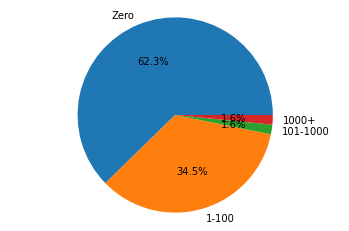

In [130]:
labels = []
counts = []

for x, y in vals_Dict.items():
    labels.append(x)
    counts.append(y)

plt.pie(counts, labels=labels,autopct='%1.1f%%')

plt.axis('equal')
plt.show()    

#Looks like about 62% of the 2014 and 2016 data averaged out to 0 from the sample.
#This leaves evidence that we can set the NaNs in the 2015 dataset to 0

In [132]:
#Set all NaNs in the 2015 set to 0

df_AllData.loc[(df_AllData['Tax Benefits'].isna())&(df_AllData['Year']==2015),'Tax Benefits']=0.0


In [133]:
df_AllData.to_csv('1996_2020_SunshineList.csv',index=False)